<a href="https://colab.research.google.com/github/Sagor0078/AI/blob/main/laball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


   s + 1
-----------
s^2 + s + 1


   0.8738 z - 0.2918
-----------------------
z^2 - 0.7859 z + 0.3679

dt = 1



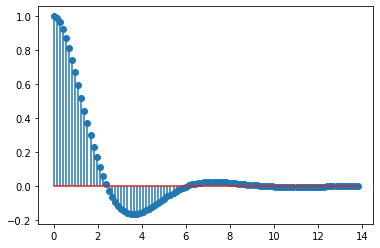

Roots: [0.39294656+0.46203078j 0.39294656-0.46203078j]


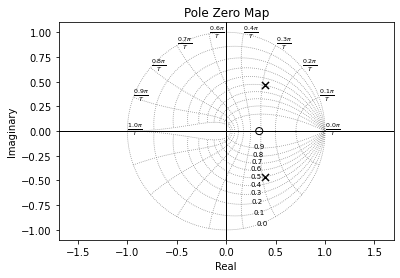

In [ ]:
import control
import matplotlib.pyplot as plt

f = control.tf([1, 1], [1, 1, 1])
print(f)
z = control.c2d(f, 1)
print(z)
# plot the inverse z-transform
t, h = control.impulse_response(f)
plt.stem(t, h)
plt.show()
control.pzmap(z, True, 'PZmap')
# calculate roots of transfer function
roots = control.pole(z)
print("Roots:", roots)


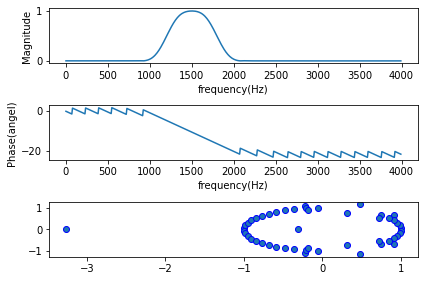

In [ ]:
#FIR bandpass filter
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

fs = 8000  # sampling rate
N = 50  # order of filer
fc = np.array([1200, 1800])  # cutoff frequency
# wc = 2 * fc / fs  # normalized cutoff frequency to the nyquist frequency
#Generate the filter coefficients b using the sig.firwin() function from the scipy.signal library. This function generates
# the filter coefficients for a finite impulse response (FIR) filter given its order, cutoff frequencies, sampling rate, windowing function, and other parameters
b = sig.firwin(N + 1, fc, fs=fs, window='hamming', pass_zero='bandpass')
w, h_freq = sig.freqz(b, fs=fs)
#Calculate the poles and zeros of the transfer function using the sig.tf2zpk()
z, p, k = sig.tf2zpk(b, 1)

plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h_freq))  # magnitude
plt.xlabel('frequency(Hz)')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h_freq)))  # phase
plt.xlabel('frequency(Hz)')
plt.ylabel('Phase(angel)')

plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b')
plt.tight_layout()
plt.show()


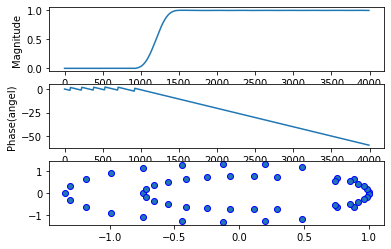

In [ ]:
#FIR high pass filter
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

fs = 8000  # sampling rate
N = 50  # order of filer
fc = 1200  # cutoff frequency
b = sig.firwin(N + 1, fc, fs=fs, window='hamming', pass_zero='highpass')
w, h_freq = sig.freqz(b, fs=fs)
z, p, k = sig.tf2zpk(b, 1)

plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h_freq))  # magnitude
plt.xlabel('frequency(Hz)')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h_freq)))  # phase
plt.xlabel('frequency(Hz)')
plt.ylabel('Phase(angel)')

plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b')
plt.show()


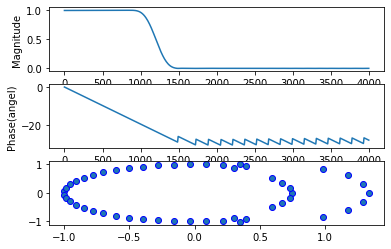

In [ ]:
#FIR lowpass filter
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

fs = 8000  # sampling rate
N = 50  # order of filer
fc = 1200  # cutoff frequency
# wc = 2 * fc / fs  # normalized cutoff frequency to the nyquist frequency
b = sig.firwin(N + 1, fc, fs=fs, window='hamming', pass_zero='lowpass')
w, h_freq = sig.freqz(b, fs=fs) # calculate the frequency response
z, p, k = sig.tf2zpk(b, 1) # calculate zeros and pole in z-transform

plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h_freq))  # magnitude
plt.xlabel('frequency(Hz)')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h_freq)))  # phase
plt.xlabel('frequency(Hz)')
plt.ylabel('Phase(angel)')

plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b')
plt.show()


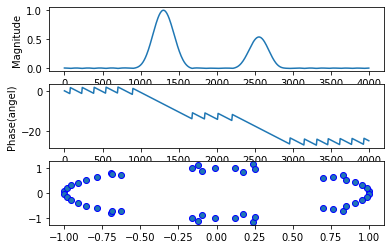

In [ ]:
#FIR multibandpass filter
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

N = 50
fs = 8000
fc = np.array([1200, 1400, 2500, 2600])
b = sig.firwin(N + 1, fc, fs=fs, window='hamming', pass_zero='bandpass')
w, h_freq = sig.freqz(b, fs=fs)
z, p, k = sig.tf2zpk(b, 1)

plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h_freq))  # magnitude
plt.xlabel('frequency(Hz)')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h_freq)))  # phase
plt.xlabel('frequency(Hz)')
plt.ylabel('Phase(angel)')

plt.subplot(3, 1, 3)
# plt.title('Plot zeros and poles in z-transform')
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b')
plt.show()


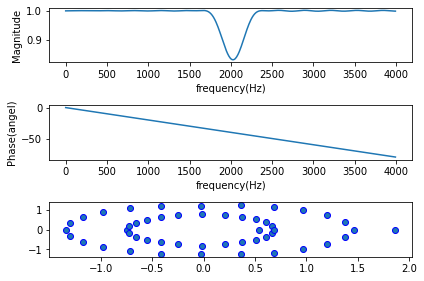

In [ ]:
#FIR notch filter
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

fs = 8000
N = 50
fc = np.array([2000, 2050])
b = sig.firwin(N + 1, fc, fs=fs, window='hamming', pass_zero='bandstop')
z, p, k = sig.tf2zpk(b, 1)
w, h_freq = sig.freqz(b, 1, fs=fs)

plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h_freq))
plt.xlabel('frequency(Hz)')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h_freq)))
plt.xlabel('frequency(Hz)')
plt.ylabel('Phase(angel)')

plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b')
plt.tight_layout()
plt.show()


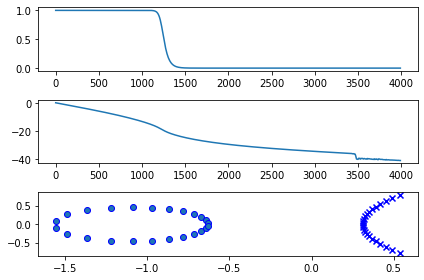

In [ ]:
#IIR low pass filter
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

fs = 8000
n, w = sig.buttord(1200 / 4000, 1500 / 4000, 1, 50)
[b, a] = sig.butter(n, w)
w, h = sig.freqz(b, a, 512, fs=8000)
z, p, k = sig.tf2zpk(b, a)

plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h))

plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h)))

plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b')
plt.tight_layout()
plt.show()


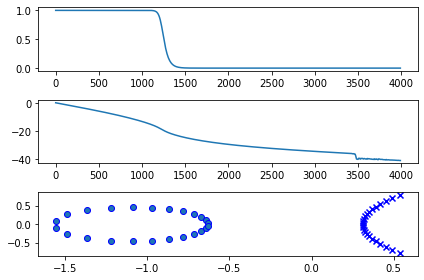

In [ ]:
#IIR high pass filter
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

fs = 8000
n, w = sig.buttord(1200 / 4000, 1500 / 4000, 1, 50)
[b, a] = sig.butter(n, w)
w, h = sig.freqz(b, a, 512, fs=8000)
z, p, k = sig.tf2zpk(b, a)

plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h))

plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h)))

plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b')
plt.tight_layout()
plt.show()


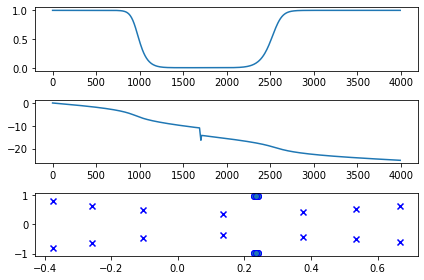

In [ ]:
#IIR bandstop filter
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

fs = 8000
[n, w] = sig.buttord([1000 / 4000, 2500 / 4000], [400 / 4000, 3200 / 4000], 1, 50)
[b, a] = sig.butter(n, w, btype='bandstop')
w, h = sig.freqz(b, a, 512, fs=fs)
z, p, k = sig.tf2zpk(b, a)

plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h))

plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h)))

plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b')
plt.tight_layout()
plt.show()


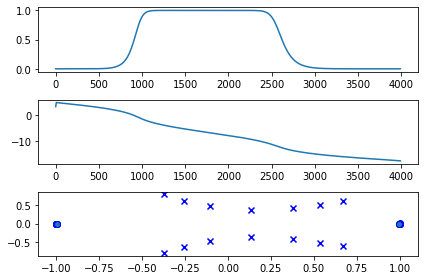

In [ ]:
#IIR bandpass filter
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

fs = 8000
[n, w] = sig.buttord([1000 / 4000, 2500 / 4000], [400 / 4000, 3200 / 4000], 1, 50)
[b, a] = sig.butter(n, w, btype='bandpass')
w, h = sig.freqz(b, a, 512, fs=fs)
z, p, k = sig.tf2zpk(b, a)

plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h))

plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h)))

plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b')
plt.tight_layout()
plt.show()


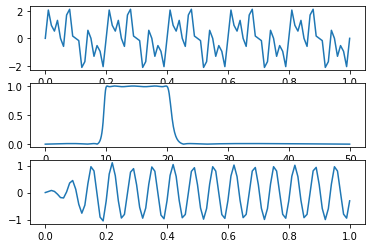

In [ ]:
#IIR signal 5HZ to 30HZ
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

fs = 100
t = np.arange(0, 1.01, 1 / fs)
s = np.sin(2 * np.pi * t * 5) + np.sin(2 * np.pi * t * 15) + np.sin(2 * np.pi * t * 30)
plt.subplot(3, 1, 1)
plt.plot(t, s)

wp1 = 10 / 50
wp2 = 20 / 50
ws1 = 5 / 50
ws2 = 25 / 50
wp = np.array([wp1, wp2])
ws = np.array([ws1, ws2])
rp = 0.1
rs = 40
[n, w] = sig.ellipord(wp, ws, rp, rs) # generate IIR eliptic signal
[b, a] = sig.ellip(n, rp, rs, w, btype='bandpass')
w, h = sig.freqz(b, a, 512, fs=fs) #generate frequency response
plt.subplot(3, 1, 2)
plt.plot(w, np.abs(h))

sf = sig.lfilter(b, a, s)
plt.subplot(3, 1, 3)
plt.plot(t, sf)
plt.show()


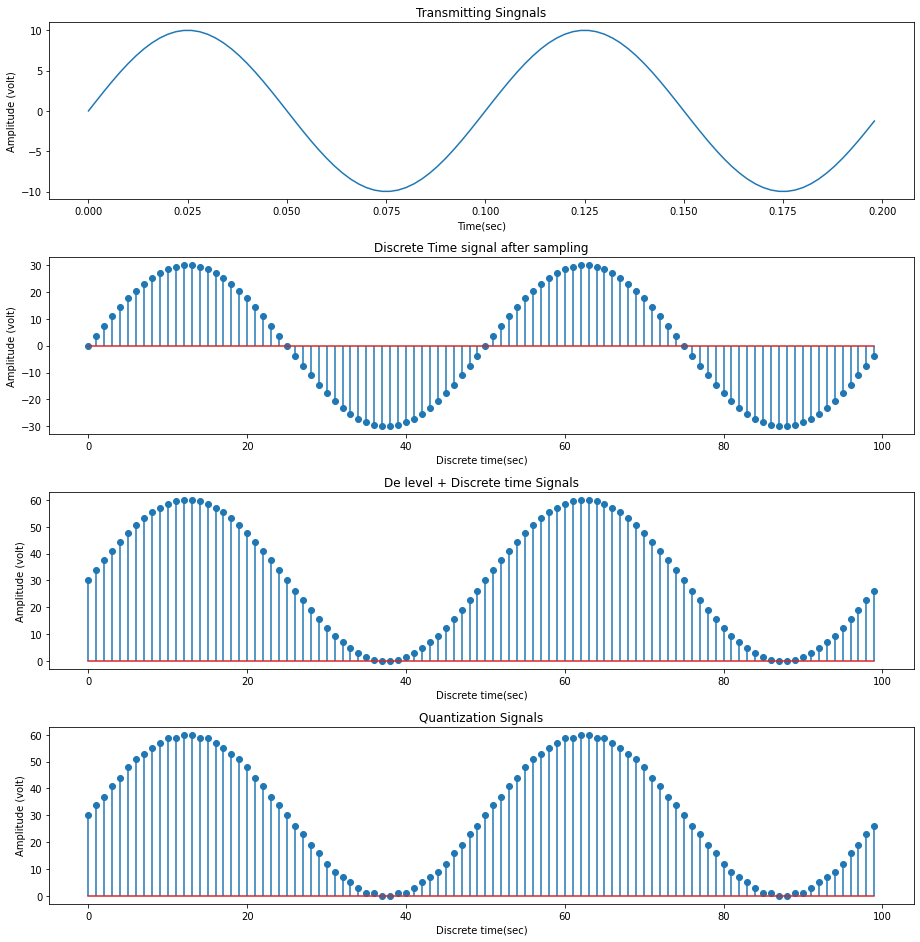

In [ ]:
#sampling 
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(4, figsize=(13, 13))

f = 10
T = 1 / f
t = np.arange(0, 2 * T, T / 50)
A = 10
y = A * np.sin(2 * np.pi * f * t)

# figure 1
plt.tight_layout()
ax[0].plot(t, y)
ax[0].set_xlabel('Time(sec)')
ax[0].set_ylabel('Amplitude (volt)')
ax[0].set_title('Transmitting Singnals')

# sampling
A = 30
# Ts = T / 20
# Fs = 1 / Ts
Fs = 500
Ts = 1 / Fs
n = np.arange(0, len(y))
y1 = A*np.sin(2 * np.pi * f * n * Ts)

# figure 2
plt.tight_layout()
ax[1].stem(n, y1)
ax[1].set_xlabel('Discrete time(sec)')
ax[1].set_ylabel('Amplitude (volt)')
ax[1].set_title('Discrete Time signal after sampling')


y1 = A + y1
# figure 3
plt.tight_layout()
ax[2].stem(n, y1)
ax[2].set_xlabel('Discrete time(sec)')
ax[2].set_ylabel('Amplitude (volt)')
ax[2].set_title('De level + Discrete time Signals')

# Quantization
y1 = np.round(y1)
# figure 4
plt.tight_layout()
ax[3].stem(n, y1)
ax[3].set_xlabel('Discrete time(sec)')
ax[3].set_ylabel('Amplitude (volt)')
ax[3].set_title('Quantization Signals')
plt.show()


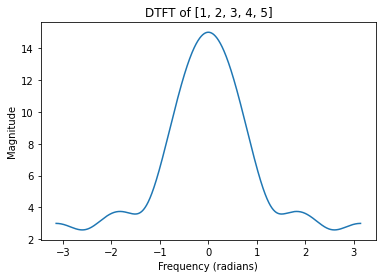

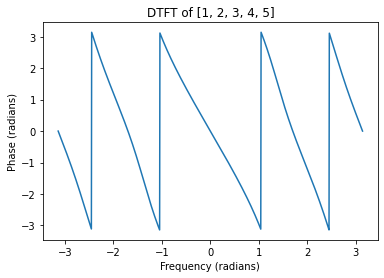

In [ ]:
#DTFT
import numpy as np
import matplotlib.pyplot as plt

# Define the sequence
x = np.array([1, 2, 3, 4, 5])

# Define the range of frequencies
w = np.linspace(-np.pi, np.pi, num=1000)

# Compute the DTFT
X = np.zeros_like(w, dtype=np.complex64)
for k in range(len(x)):
    X += x[k] * np.exp(-1j * w * k)

# Plot the magnitude of the DTFT
plt.plot(w, np.abs(X))
plt.xlabel('Frequency (radians)')
plt.ylabel('Magnitude')
plt.title('DTFT of [1, 2, 3, 4, 5]')
plt.show()

# Plot the phase of the DTFT
plt.plot(w, np.angle(X))
plt.xlabel('Frequency (radians)')
plt.ylabel('Phase (radians)')
plt.title('DTFT of [1, 2, 3, 4, 5]')
plt.show()

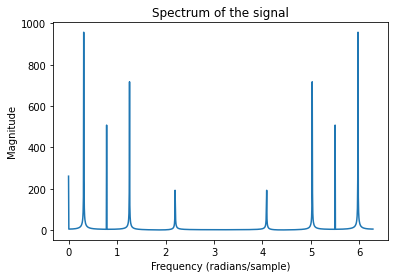

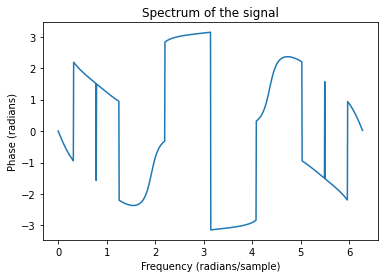

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N=1024
fs=100
T=1/fs
k=np.arange(N)
f=0.25 + 2*np.sin(2*np.pi*5*k*T) + 1*np.sin(2*np.pi*12.5*k*T) + 1.5*np.sin(2*np.pi*20*k*T) + 0.5*np.sin(2*np.pi*35*k*T)
w=np.linspace(0,2*np.pi,N,endpoint=False)
F=np.fft.fft(f)

# Plot the magnitude spectrum
plt.plot(w, np.abs(F))
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Magnitude')
plt.title('Spectrum of the signal')
plt.show()

# Plot the phase spectrum
plt.plot(w, np.angle(F))
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Phase (radians)')
plt.title('Spectrum of the signal')
plt.show()


      s^2 + 2
-------------------
s^3 + 2 s^2 - s + 1


 0.7057 z^2 - 0.3778 z + 0.6044
--------------------------------
z^3 - 2.3 z^2 + 1.902 z - 0.1353

dt = 1



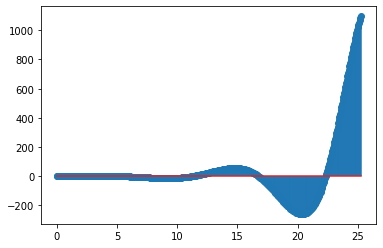

Roots: [1.11098819+0.70246159j 1.11098819-0.70246159j 0.0783305 +0.j        ]


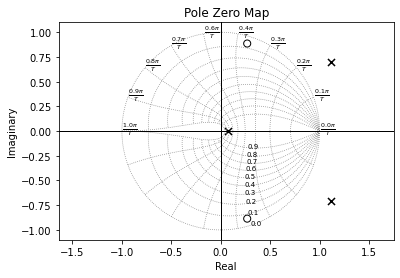

In [3]:
import control
import matplotlib.pyplot as plt

f = control.tf([1, 0,2], [1, 2, -1,1])
print(f)
z = control.c2d(f, 1)
print(z)
# plot the inverse z-transform
t, h = control.impulse_response(f)
plt.stem(t, h)
plt.show()
control.pzmap(z, True, 'PZmap')
# calculate roots of transfer function
roots = control.pole(z)
print("Roots:", roots)


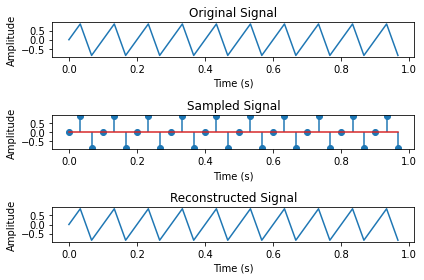

In [5]:
#constract signal
import numpy as np
import matplotlib.pyplot as plt

f=10
fs=30
t=np.arange(0,1,1/fs)
s=np.sin(2*np.pi*f*t)

# Plot the original signal
plt.subplot(3,1,1)
plt.plot(t, s)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')

Ts=1/fs
n=np.arange(0,1,Ts)
sn=np.sin(2*np.pi*f*n)

# Plot the sampled signal
plt.subplot(3,1,2)
plt.stem(n, sn)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sampled Signal')

# Reconstruct the analog signal using ideal reconstruction
sr=np.zeros_like(t) # Initialize the reconstructed signal
for i in range(len(n)):
    sr+=sn[i]*np.sinc((t-Ts*i)/Ts)

# Plot the reconstructed signal
plt.subplot(3,1,3)
plt.plot(t, sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Reconstructed Signal')

plt.tight_layout()
plt.show()